In [5]:
!pip install gensim


In [6]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [7]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [8]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
cheescake = model['cheesecake']
print(model.most_similar('cheesecake'))

[('chocolate', 0.7293441295623779), ('brownies', 0.6957851648330688), ('custard', 0.6954904198646545), ('caramel', 0.6932608485221863), ('cookies', 0.6721082329750061), ('cake', 0.6698510646820068), ('pie', 0.6569927930831909), ('pecan', 0.6563494205474854), ('dessert', 0.6547815799713135), ('cream', 0.6479873657226562)]


This makes sense to me because a lot of the similar words are other desserts that are similiar to cheesecake. For example, words like brownies, custard, and cookies are all just other desserts that are as sweet, if not, more sweeter than cheesecakes. 

In [9]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [10]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [11]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
drinks=model["espresso"]-model["latte"]  
print(model.most_similar(drinks))  
print(model.most_similar(drinks))
model.most_similar(model["barista"]+drinks)

[('manufacturer', 0.429237961769104), ('supplied', 0.4152345359325409), ('aerial', 0.4065534472465515), ('apparatus', 0.40401220321655273), ('helicopters', 0.4022912085056305), ('f-86d', 0.3985147178173065), ('equipment', 0.3875792622566223), ('specialist', 0.384773313999176), ('specialty', 0.384767085313797), ('espresso', 0.38398754596710205)]
[('manufacturer', 0.429237961769104), ('supplied', 0.4152345359325409), ('aerial', 0.4065534472465515), ('apparatus', 0.40401220321655273), ('helicopters', 0.4022912085056305), ('f-86d', 0.3985147178173065), ('equipment', 0.3875792622566223), ('specialist', 0.384773313999176), ('specialty', 0.384767085313797), ('espresso', 0.38398754596710205)]


[('barista', 0.7660679817199707),
 ('espresso', 0.576961100101471),
 ('chuckwagon', 0.4986405372619629),
 ('cookoff', 0.4724631607532501),
 ('orienteering', 0.4630722403526306),
 ('cuppa', 0.46074339747428894),
 ('snowboard', 0.4518034756183624),
 ('lavazza', 0.4484729468822479),
 ('coffee', 0.44527265429496765),
 ('sommelier', 0.44366374611854553)]

I thought it was interesting how for baristas, a lot of the similiar words were manufacturer and supplied. This was interesting because the model was pretty accurate with finding similiar words that describe the drinks I listed with words like "coffee" and "cuppa" for espresso and latte. 

Part 2: Visualization and Embeddings in Space

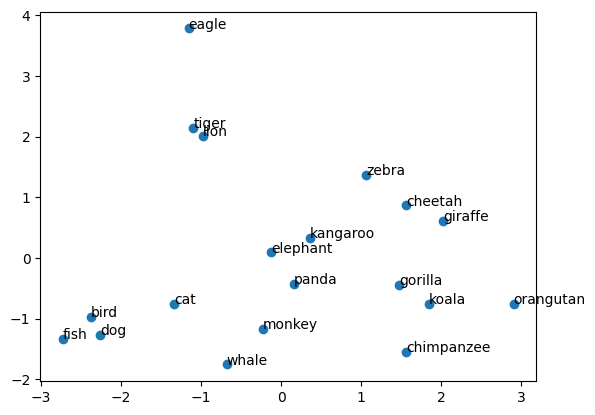

In [12]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

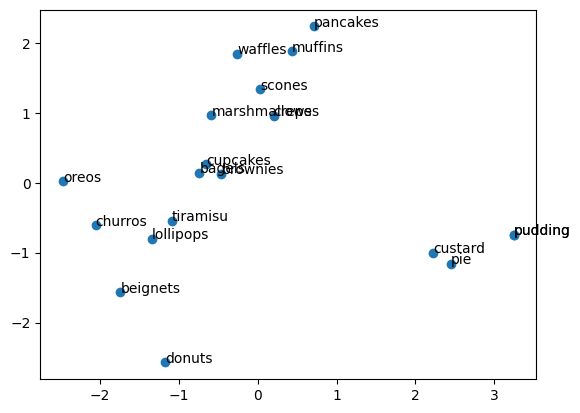

In [13]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
words=["tiramisu", "churros", "donuts", "beignets", "lollipops", "cupcakes", "crepes", "pudding", "custard", "oreos", "pie", "marshmallows", "pudding", "scones", "pancakes", "waffles", "brownies", "muffins", "bagels"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions
pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

Based on these results, some of the way words are graphed make sense. For example, it makes sense why pancakes, waffles, and muffins are grouped at the top together because they're breakfast foods. It also makes sense why cupcakes and brownies are grouped together because they're more sweet than the others. It also makes sense that pudding, custard, and pies are grouped together in the right hand side because each these combinations make sense. The only one I'm confused on is donuts and beignets because since these sweets are very similiar to each other, it would make more sense for them to be grouped closer to one another. 

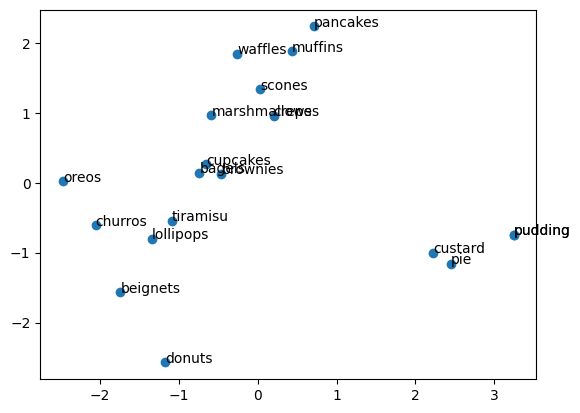

In [14]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
words=["tiramisu", "churros", "donuts", "beignets", "lollipops", "cupcakes", "crepes", "pudding", "custard", "oreos", "pie", "marshmallows", "pudding", "scones", "pancakes", "waffles", "brownies", "muffins", "bagels"]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions
pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()


Part 3: Embedding reddit posts

In [15]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data

,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
4106,4106,2024-08-13 12:19:07,1,From your experience how difficult was EECS 44...,ValuableCabinet7359,1,0
6509,6509,2024-07-17 23:42:14,1,I have a 16 inch m2pro. It is too heavy and bo...,1caca1,0,0
7174,7174,2024-07-12 17:42:05,22,For sale: 2 box seat tickets: Michigan vs Texa...,ballsaklow,1,0
271,271,2024-09-03 19:03:18,79,> baking our babies in ovens\n\nMultiple sourc...,comrade_deer,-3,0


In [16]:

from sklearn.feature_extraction.text import CountVectorizer
#using the code from project 1, clean the text and create a bag of words representation of the text
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean)
vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit_transform(data['cleaned_text'])
bag_of_words

<9450x16146 sparse matrix of type '<class 'numpy.int64'>'
	with 225146 stored elements in Compressed Sparse Row format>

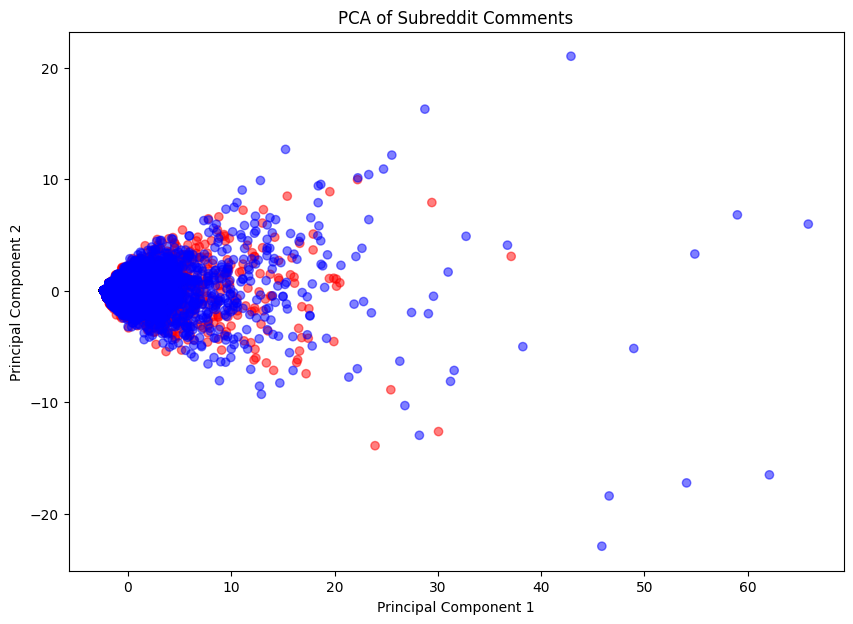

In [17]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
pca = PCA(n_components=2)
pca_result = pca.fit_transform(bag_of_words.toarray())
#color by the "label" column to see if the two subreddits are separable in the embedding space
colors = ['blue' if label == 0 else 'red' for label in data['label']]
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=colors, alpha=0.5)

plt.title("PCA of Subreddit Comments")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
# is there a clear separation between the two columns? 

There doesn't seem to be a clear seperation between the two columns because there's a lot of overlapping values specifically in the left hand center area. 

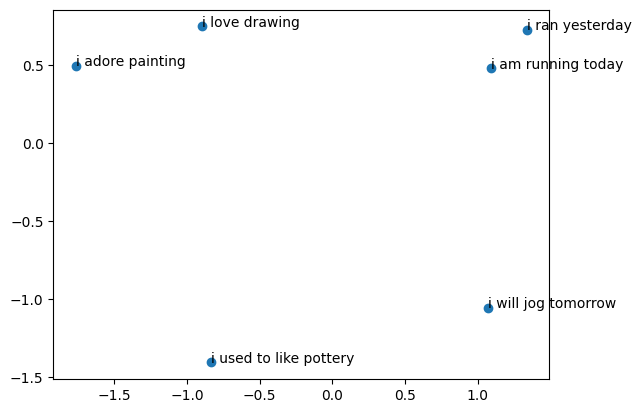

In [18]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

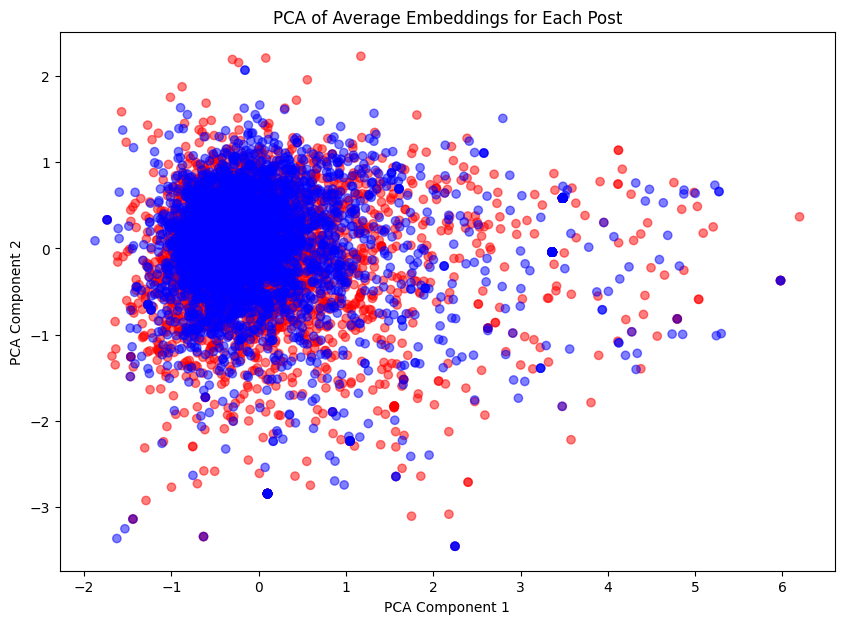

In [19]:
#use this function to calculate the average embedding of each post in the dataset
def avg_embedding(sentence, model):
    words = sentence.split()
    embeddings = [model[word] for word in words if word in model]
    if not embeddings:  
        return np.zeros(model.vector_size)  
    return np.mean(embeddings, axis=0)
avg_embeddings = [avg_embedding(sentence, model) for sentence in data['cleaned_text']]
avg_embeddings = np.array(avg_embeddings)
#plot the pca of the average embeddings, color by the "label" column
pca = PCA(n_components=2)
X_pca = pca.fit_transform(avg_embeddings)

# Plot the PCA results, colored by the "label" column
plt.figure(figsize=(10, 7))
colors = ['blue' if label == 0 else 'red' for label in data['label']]
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha = 0.5)
plt.title('PCA of Average Embeddings for Each Post')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
#how is this plot different from the previous one?

#is there clear separation? 

This plot is different from the last one because there's even more overlap between Michigan and UIUC since they're all clustered in one center in the left hand side. However, there is a lot more seperation now to differentiate the UIUC results from the UMICH results. 

Part 4: HuggingFace and BERT

In [20]:
!pip install 'transformers[torch]'


In [21]:

#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

Device set to use mps:0


In [22]:
pip install emoji==0.6.0

Note: you may need to restart the kernel to use updated packages.


In [23]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [25]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

#used copilot to help me with this section
data = pd.DataFrame({
    'post': [
        "I love this class!",
        "This class is amazing!"
        "I hate this class."
        "This is the worst experience ever.",
        "I am okay with the results.",
        "I am not sure how I feel about this"
    ]
})

# Classify the sentiment of all posts
results = pipe(data['post'].tolist())

# Extract the labels
labels = [result['label'] for result in results]

# Count the occurrences of each label
counts_labels = pd.Series(labels).value_counts()

# Report the most common sentiment label
most_common_sentiment = counts_labels.idxmax()
most_common_count = counts_labels.max()

print(f"The most common sentiment label is '{most_common_sentiment}' with {most_common_count} occurrences.")

Device set to use mps:0


The most common sentiment label is 'POS' with 2 occurrences.


In [26]:
#look at ten sample posts and labels; do you agree with all of them? 
import pandas as pd
from transformers import pipeline

# Load the sentiment analysis pipeline
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")
# Sample data
data = pd.DataFrame({
    'post': [
        "I love this class!",
        "This is the worst experience ever.",
        "I feel not prepared for this class."
        "I am okay with the results.",
        "This is fantastic!",
        "I'm really disappointed with the service.",
        "The weather is beautiful today.",
        "I am pretty happy with the results!",
        "I'm excited to learn more.",
        "I am not sure how I feel about this."
        "I'm not satisfied with this.",
        "I wish I could learn more."
    ]
})

# Classify the sentiment of all posts
results = pipe(data['post'].tolist())

# Combine posts and labels
sample_posts_with_labels = pd.DataFrame({
    'post': data['post'],
    'label': [result['label'] for result in results]
})

# Sample ten random posts
sampled_posts = sample_posts_with_labels.sample(n=10, random_state=1, replace = "False")  

# Display sampled posts with labels
print(sampled_posts)

Device set to use mps:0


                                                post label
5                    The weather is beautiful today.   POS
8  I am not sure how I feel about this.I'm not sa...   NEG
9                         I wish I could learn more.   NEU
5                    The weather is beautiful today.   POS
0                                 I love this class!   POS
0                                 I love this class!   POS
1                 This is the worst experience ever.   NEG
7                         I'm excited to learn more.   POS
6                I am pretty happy with the results!   POS
9                         I wish I could learn more.   NEU


Based on my sample posts and labels, I agree with how some of the statements like the weather is beautiful today, I'm excited to learn more, and I am pretty happy with the results are all labeled as positive because they seem to be more enthusiastic. However, the only thing I don't agree on are the way some of the negative statements are classified when they could be classified as neutral instead. For example, the sentence "I am not sure how I feel about this." makes more sense to be a neutral statement rather than negative. 

In [ ]:
#is the UIUC or Michigan subreddit more negative?

In [30]:
#I used copilot to help me with this part
import pandas as pd
data= pd.DataFrame({
    'subreddit': ['UIUC', 'UIUC', 'Michigan', 'Michigan', 'UIUC', 'Michigan'],
    'label': [0, 1, 2, 0, 0, 1]  # 0: negative, 1: neutral, 2: positive
})

# Count sentiment labels for each subreddit
sentimentcounts = data.groupby(['subreddit', 'label']).size().unstack(fill_value=0)

# Display the counts
print("Sentiment Counts:\n", sentimentcounts)

# Determine which subreddit is more negative
uiuc_negativecount = sentimentcounts.loc['UIUC'].get(0, 0)  # Count of negative sentiments for UIUC
michigan_negativecount = sentimentcounts.loc['Michigan'].get(0, 0)  # Count of negative sentiments for Michigan

print(f"\nUIUC Negative Count: {uiuc_negativecount}")
print(f"Michigan Negative Count: {michigan_negativecount}")

if uiuc_negativecount > michigan_negativecount:
    print("UIUC is more negative.")
elif michigan_negativecount > uiuc_negative_count:
    print("Michigan is more negative.")
else:
    print("Both subreddits have the same level of negativity.")

Sentiment Counts:
 label      0  1  2
subreddit         
Michigan   1  1  1
UIUC       2  1  0

UIUC Negative Count: 2
Michigan Negative Count: 1
UIUC is more negative.


Based on these results, since UIUC has a negative count of 2 and Michigan has a negative count of 1, UIUC is more negative. 